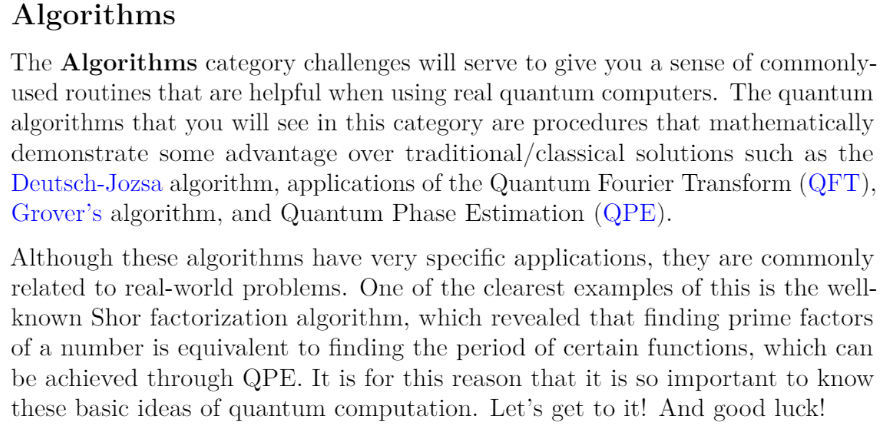

# 100 Points

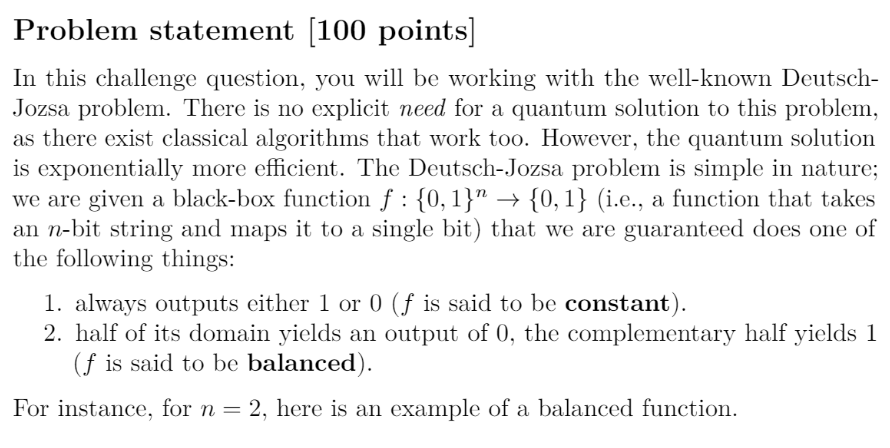

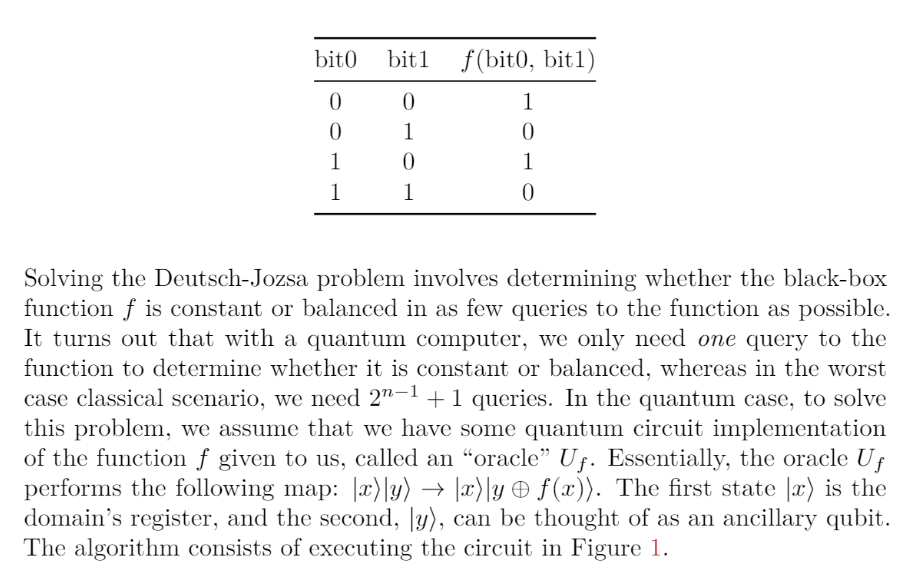

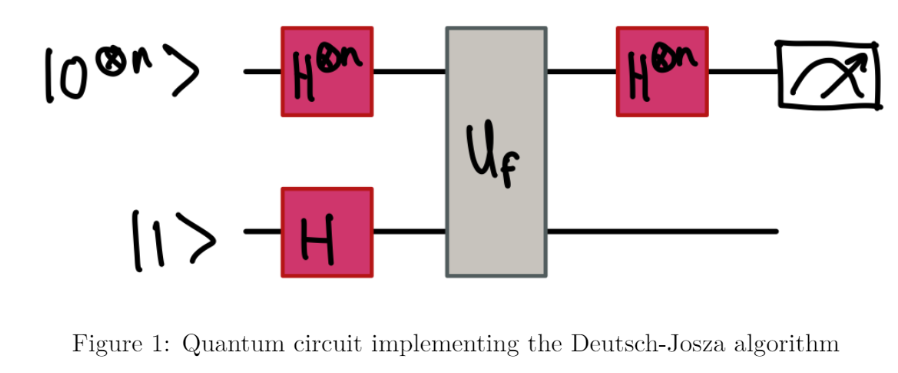

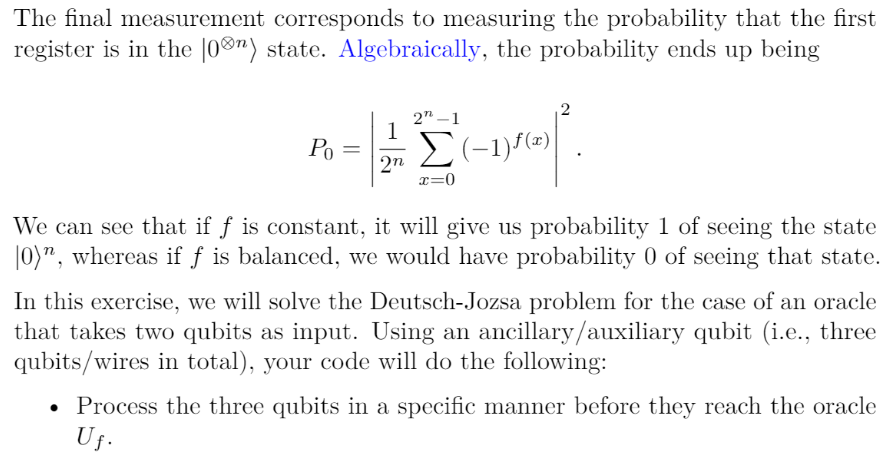

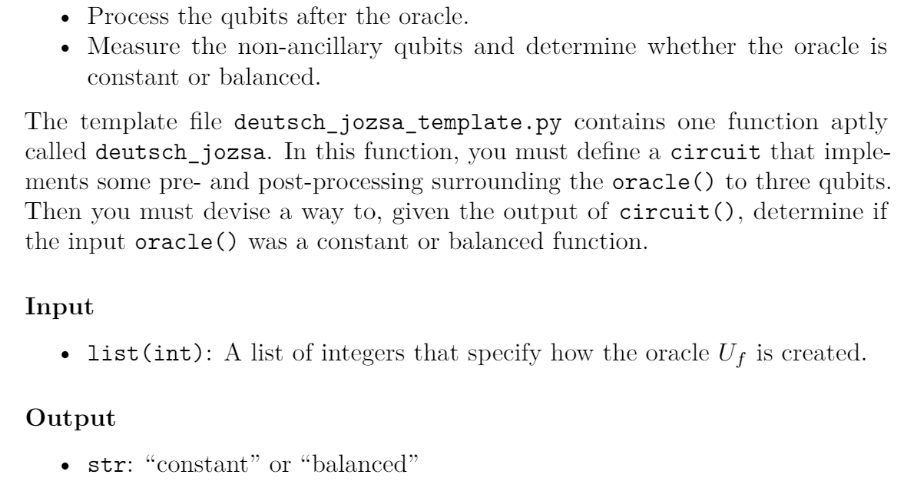

In [2]:
import sys
import pennylane as qml
from pennylane import numpy as np


def deutsch_jozsa(oracle):
    """This function will determine whether an oracle defined by a function f is constant or balanced.
    Args:
        - oracle (function): Encoding of the f function as a quantum gate. The first two qubits refer to the input and the third to the output.
    Returns:
        - (str): "constant" or "balanced"
    """

    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def circuit():
        """Implements the Deutsch Jozsa algorithm."""

        # QHACK #

        # Insert any pre-oracle processing here
        qml.PauliX(2)
        for i in range(3):
            qml.Hadamard(i)


        #oracle()  # DO NOT MODIFY this line
        qml.CNOT(wires=[0,2])

        # Insert any post-oracle processing here
        for i in range(2):
            qml.Hadamard(i)
        # QHACK #

        return qml.state()

    sample = circuit()
    # QHACK #
    # From `sample` (a single call to the circuit), determine whether the function is constant or balanced.
    if np.allclose(sample[:2], [0,0]):
        return "constant"
    
    return "balanced"

    # QHACK #

inputs = [1,1]
numbers = [int(i) for i in inputs]

def oracle():
    for i in numbers:
        qml.CNOT(wires=[i, 2])

output = deutsch_jozsa(oracle)
print('Obtained answer:',output)
print('Expected answer: constant')

Obtained answer: constant
Expected answer: constant


# 200 Points

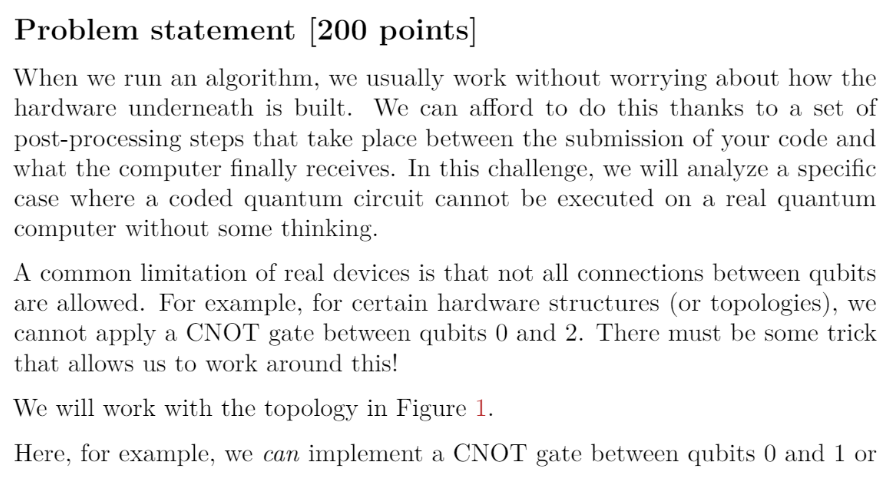

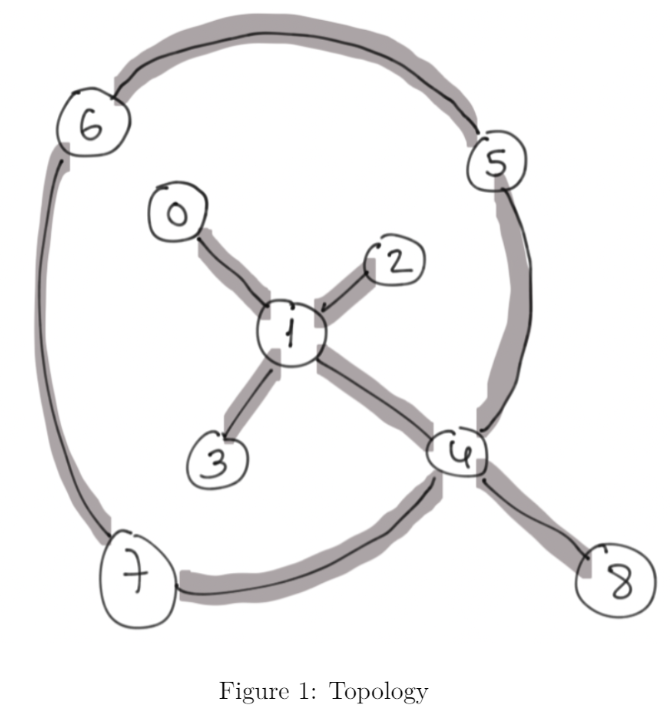

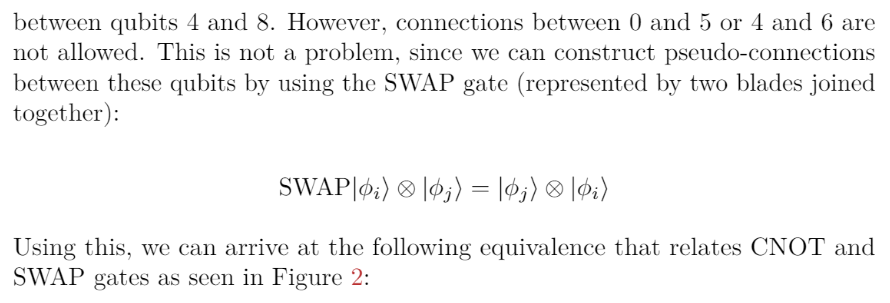

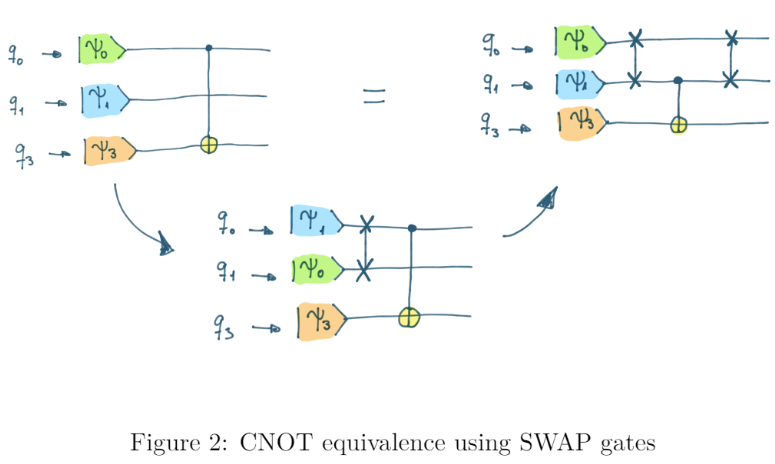

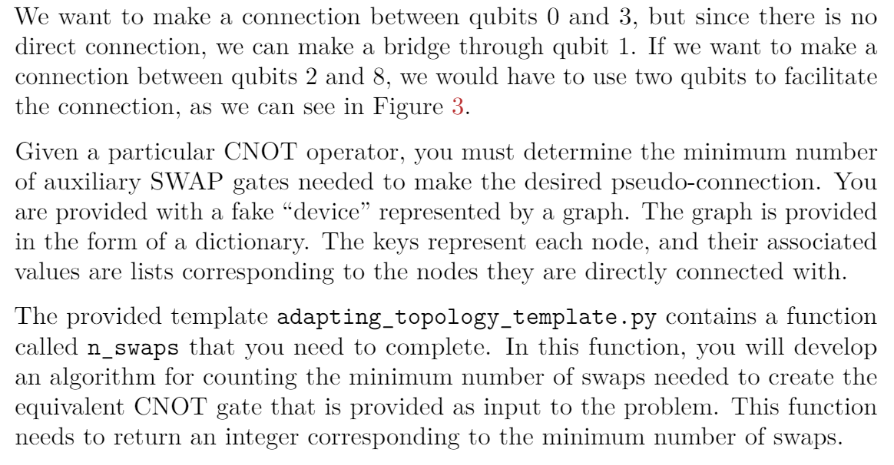

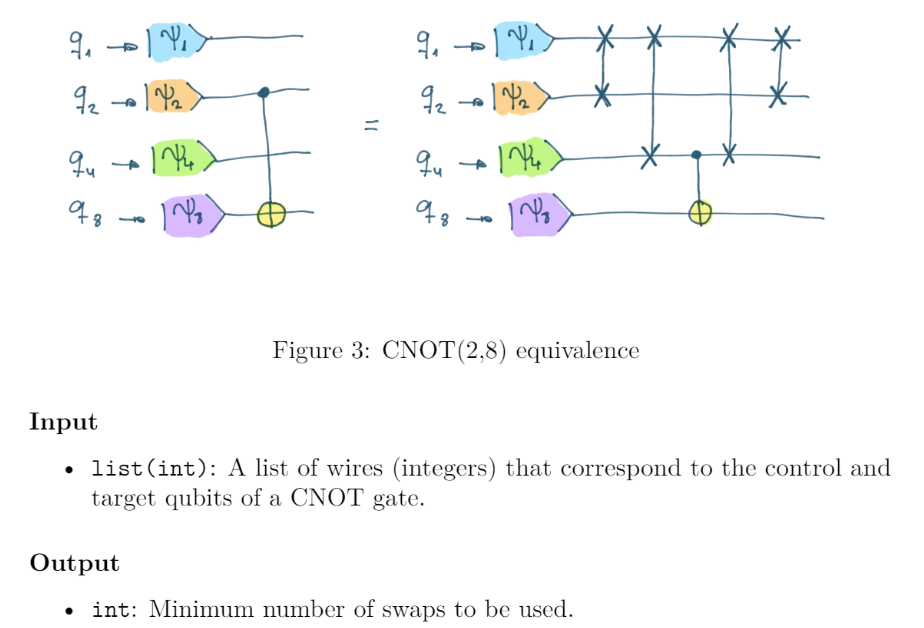

In [3]:
import sys
from pennylane import numpy as np
import pennylane as qml

graph = {
    0: [1],
    1: [0, 2, 3, 4],
    2: [1],
    3: [1],
    4: [1, 5, 7, 8],
    5: [4, 6],
    6: [5, 7],
    7: [4, 6],
    8: [4],
}


def n_swaps(cnot):
    """Count the minimum number of swaps needed to create the equivalent CNOT.
    Args:
        - cnot (qml.Operation): A CNOT gate that needs to be implemented on the hardware
        You can find out the wires on which an operator works by asking for the 'wires' attribute: 'cnot.wires'
    Returns:
        - (int): minimum number of swaps
    """

    # QHACK #
    w = cnot.wires
    start = w[0]
    goal = w[1]
    def BFS_SP(graph, start, goal):
        explored = []

        # Queue for traversing the
        # graph in the BFS
        queue = [[start]]

        # Loop to traverse the graph
        # with the help of the queue
        while queue:
            path = queue.pop(0)
            node = path[-1]

            # Condition to check if the
            # current node is not visited
            if node not in explored:
                neighbours = graph[node]

                # Loop to iterate over the
                # neighbours of the node
                for neighbour in neighbours:
                    new_path = list(path)
                    new_path.append(neighbour)
                    queue.append(new_path)

                    # Condition to check if the
                    # neighbour node is the goal
                    if neighbour == goal:
                        return len(new_path)
                explored.append(node)

    s =BFS_SP(graph, start, goal)
    return (s-2)*2
    # QHACK #

inputs = [8,2]
output = n_swaps(qml.CNOT(wires=[int(i) for i in inputs]))
print(f"Obtained answer: {output}")
print('Expected answer: 4')

Obtained answer: 4
Expected answer: 4


# 300 Points

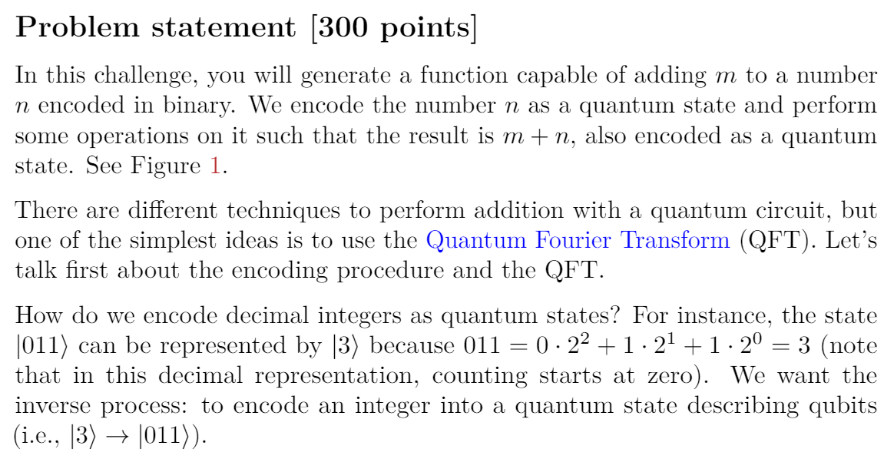

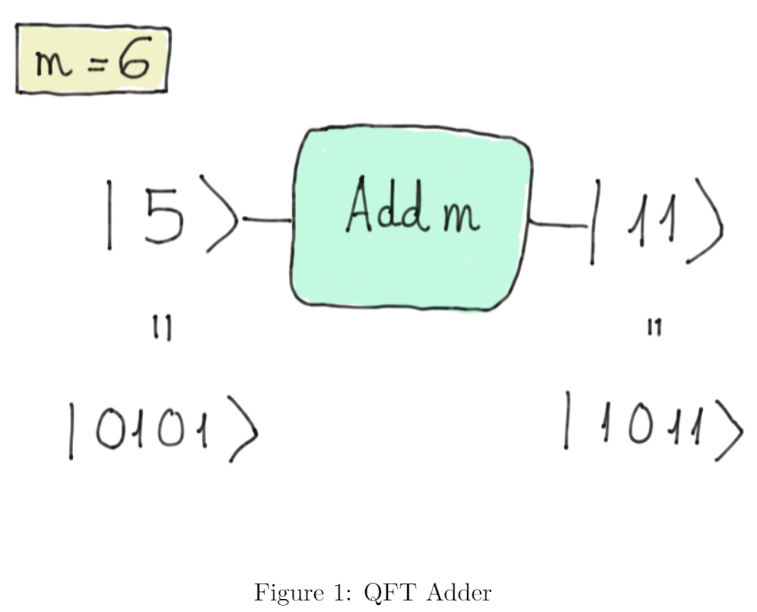

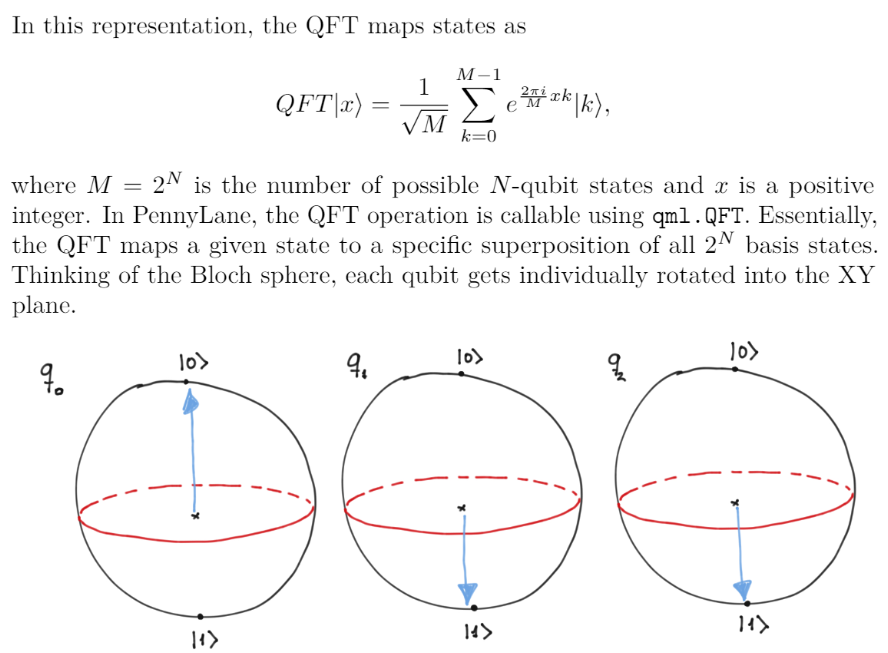

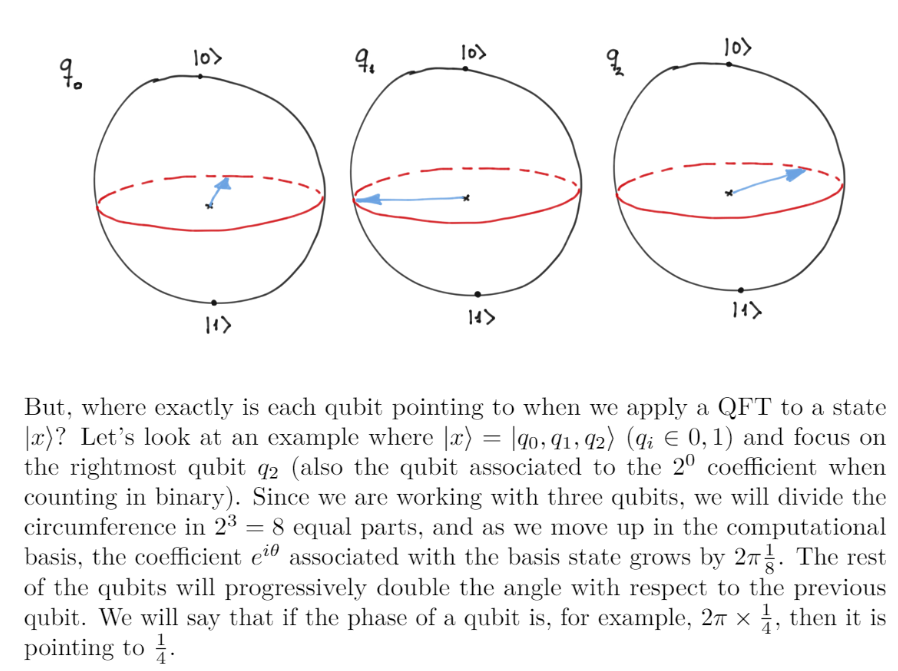

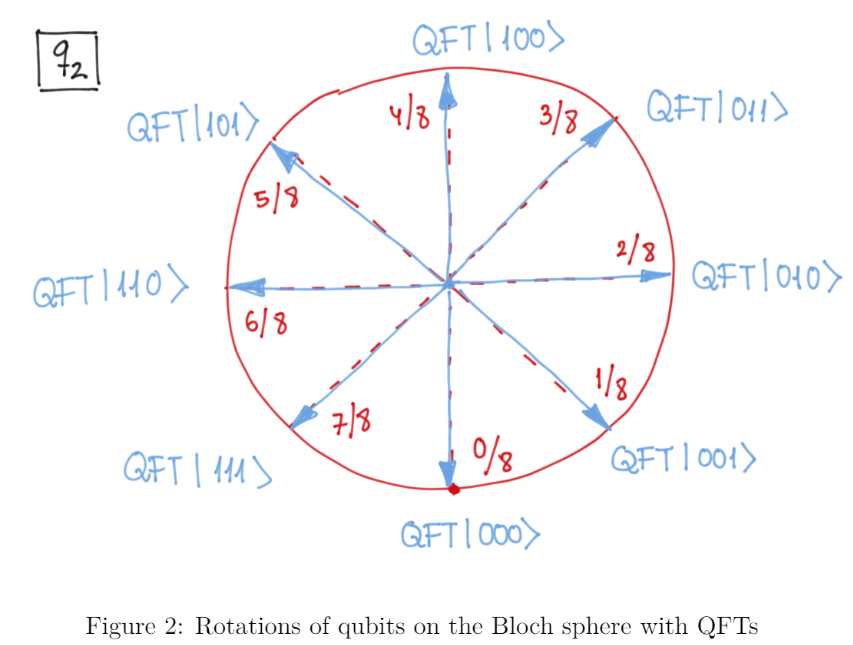

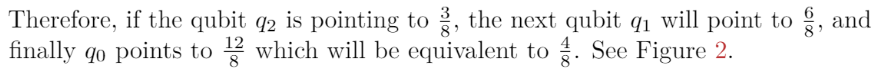

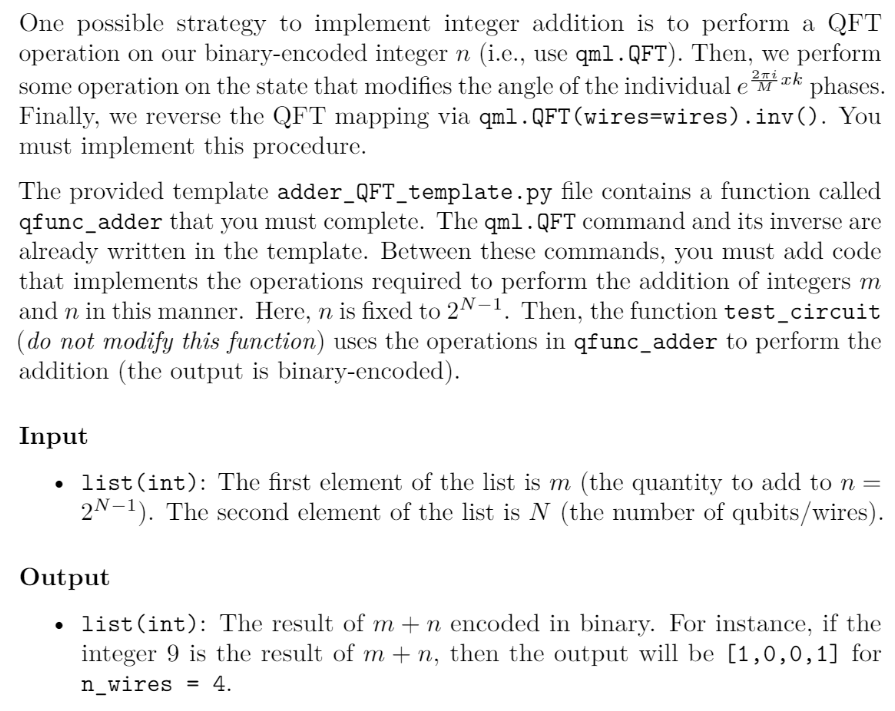

In [9]:
import sys
from pennylane import numpy as np
import pennylane as qml


def qfunc_adder(m, wires):
    """Quantum function capable of adding m units to a basic state given as input.
    Args:
        - m (int): units to add.
        - wires (list(int)): list of wires in which the function will be executed on.
    """

    qml.QFT(wires=wires)

    # QHACK #
    for i in wires:
        k = i+1
        qml.RZ(2*np.pi*m/2**k, wires = i)


    # QHACK #

    qml.QFT(wires=wires).inv()


inputs = [5,4]
m = int(inputs[0])
n_wires = int(inputs[1])
wires = range(n_wires)

dev = qml.device("default.qubit", wires=wires, shots=1)

@qml.qnode(dev)
def test_circuit():
    # Input:  |2^{N-1}>
    qml.PauliX(wires=0)

    qfunc_adder(m, wires)
    return qml.sample()

output = test_circuit()
print('Obtained answer:', output)
print('Expected answer: [1 1 0 1]')

Obtained answer: [1 1 0 1]
Expected answer: [1 1 0 1]


# 400 Points

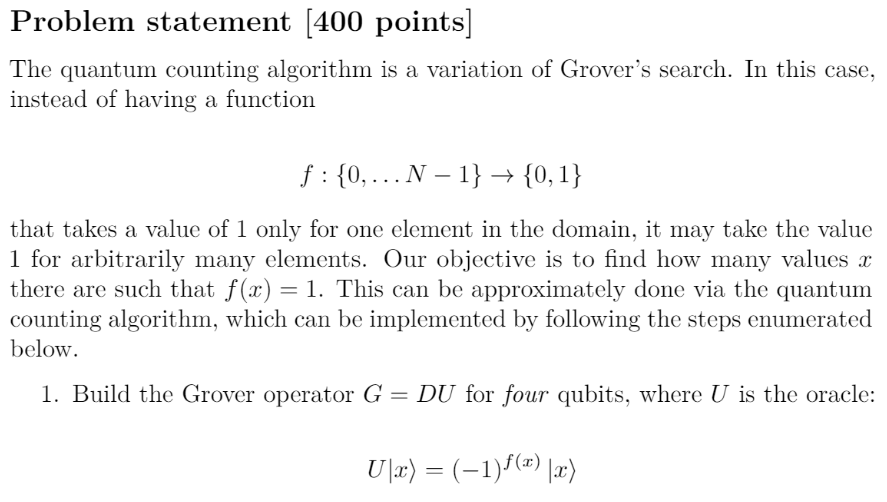

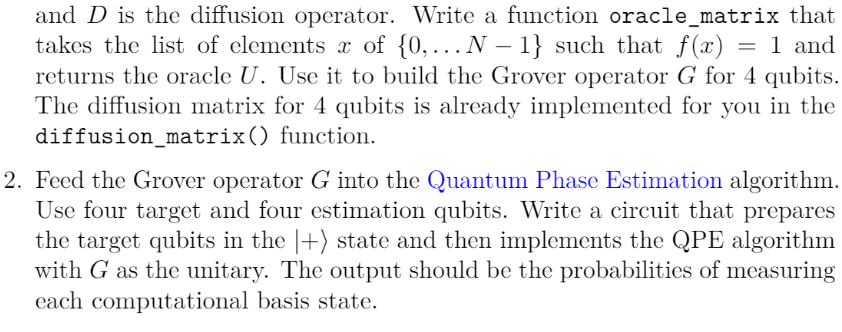

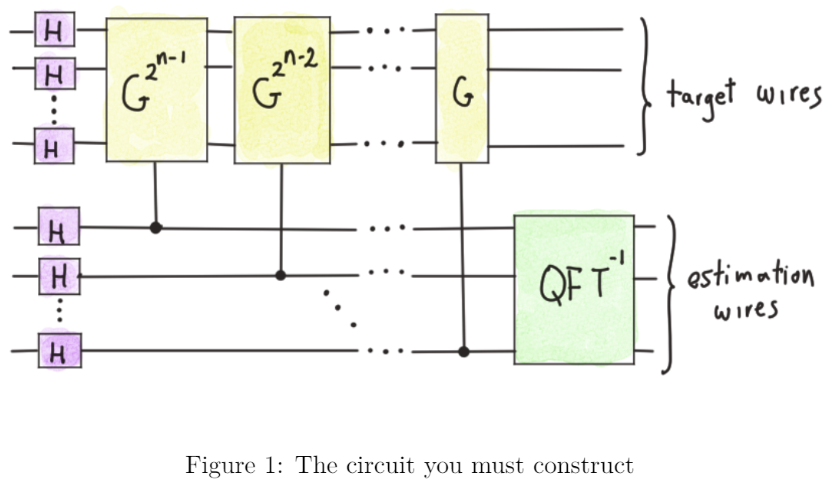

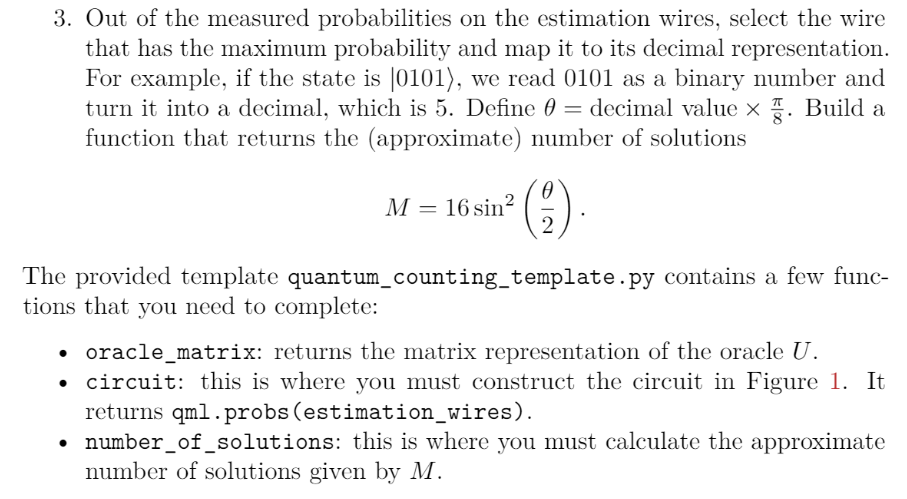

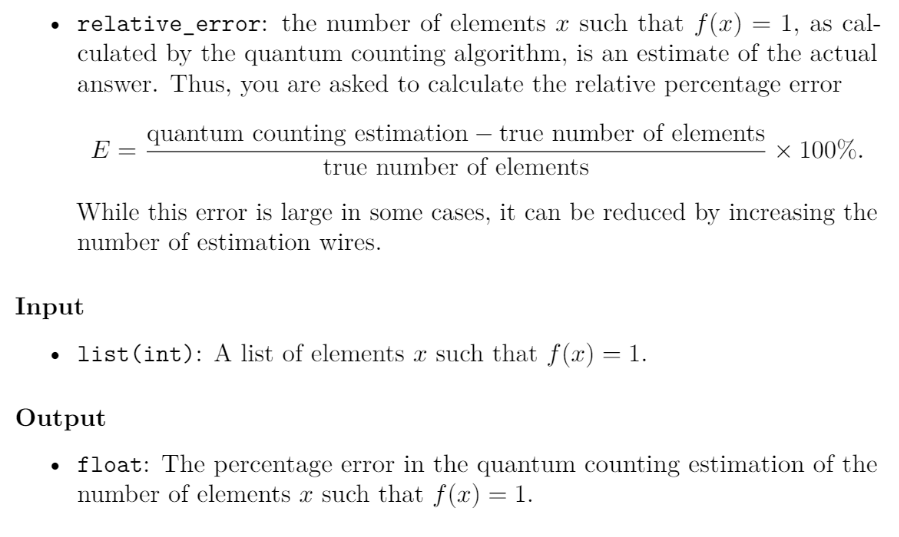

In [10]:
import sys
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import QuantumPhaseEstimation


dev = qml.device("default.qubit", wires=8)

def oracle_matrix(indices):
    """Return the oracle matrix for a secret combination.
    Args:
        - indices (list(int)): A list of bit indices (e.g. [0,3]) representing the elements that are map to 1.
    Returns:
        - (np.ndarray): The matrix representation of the oracle
    """

    # QHACK #
    u = np.identity(16)
    for i in indices:
        u[i][i] = -1

    # QHACK #

    return u


def diffusion_matrix():

    # DO NOT MODIFY anything in this code block

    psi_piece = (1 / 2 ** 4) * np.ones(2 ** 4)
    ident_piece = np.eye(2 ** 4)
    return 2 * psi_piece - ident_piece


def grover_operator(indices):

    # DO NOT MODIFY anything in this code block

    return np.dot(diffusion_matrix(), oracle_matrix(indices))


dev = qml.device("default.qubit", wires=8)

@qml.qnode(dev)
def circuit(indices):
    """Return the probabilities of each basis state after applying QPE to the Grover operator
    Args:
        - indices (list(int)): A list of bits representing the elements that map to 1.
    Returns:
        - (np.tensor): Probabilities of measuring each computational basis state
    """

    # QHACK #

    target_wires = range(4)

    estimation_wires = [4,5,6,7]

    # Build your circuit here
    for i in range(4):
        qml.Hadamard(wires = i)
    qml.QuantumPhaseEstimation(
        grover_operator(indices),
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )


    # QHACK #

    return qml.probs(estimation_wires)

def number_of_solutions(indices):
    """Implement the formula given in the problem statement to find the number of solutions from the output of your circuit
    Args:
        - indices (list(int)): A list of bits representing the elements that map to 1.
    Returns:
        - (float): number of elements as estimated by the quantum counting algorithm
    """

    # QHACK #
    pr = circuit(indices)
    w = np.argmax(pr)
    m = 16*(np.sin(w*np.pi/16))**2
    return(m)

    # QHACK #

def relative_error(indices):
    """Calculate the relative error of the quantum counting estimation
    Args:
        - indices (list(int)): A list of bits representing the elements that map to 1.
    Returns:
        - (float): relative error
    """

    # QHACK #

    rel_err = (number_of_solutions(indices) - len(indices))*100/len(indices)

    # QHACK #

    return rel_err

inputs = [0,2,3,5,6]
lst=[int(i) for i in inputs]
output = relative_error(lst)
print(f"Obtained answer: {output}")
print('Expected answer: -1.229349178414374')

Obtained answer: -1.229349178414374
Expected answer: -1.229349178414374
